In [85]:
#Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante 
#las importancias de cada variable (Decision Trees Importances):

#Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
#random_state=100
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor


In [86]:
import pandas as pd

# Cargar las primeras 100 líneas del archivo

df = pd.read_csv("covtype.data", nrows=700)
df.to_csv("covtypeI.data", index=False)

In [87]:
datos = pd.read_csv("covtypeI.data")

In [88]:
columnas_Wilderness_Area = ["Wilderness_Area" + str(i) for i in range(1, 5)]
columnas_Soil_Type = ["Soil_Type" + str(i) for i in range(1, 41)]
columnas_restantes = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
"Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon",
"Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
columna_ultima = ["Cover_Type"]
columnas_final = columnas_restantes + columnas_Wilderness_Area + columnas_Soil_Type + columna_ultima

In [89]:
datos.columns = columnas_final

In [90]:
#EJERCICIO 1
X = datos.drop('Cover_Type', axis=1)
y = datos['Cover_Type']

In [91]:
#Crear un modelo de árbol de decisión y ajustarlo a los datos:
tree_model = DecisionTreeRegressor(random_state=100)
tree_model.fit(X, y)

DecisionTreeRegressor(random_state=100)

In [92]:
#Obtener las importancias de las variables:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)

In [93]:
#Ordenar las importancias de las variables de mayor a menor:
sorted_importances = importances.sort_values(ascending=False)

In [94]:
#Calcular la suma acumulada de las importancias y el porcentaje que representa cada variable:
cumulative_importances = sorted_importances.cumsum()
cumulative_importances_percent = 100*cumulative_importances/cumulative_importances[-1]

In [95]:
#Seleccionar las variables que aglutinan hasta el 95% de la información requerida:
selected_variables = cumulative_importances_percent[cumulative_importances_percent <= 95].index
selected_variables = selected_variables.append(pd.Index(["Cover_Type"]))

print(selected_variables)

Index(['Elevation', 'Soil_Type12', 'Aspect', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Hydrology', 'Hillshade_9am', 'Cover_Type'],
      dtype='object')


In [96]:
datos_1 = datos[selected_variables]
print(datos_1)

     Elevation  Soil_Type12  Aspect  Horizontal_Distance_To_Roadways  \
0         2590            0      56                              390   
1         2804            1     139                             3180   
2         2785            0     155                             3090   
3         2595            0      45                              391   
4         2579            0     132                               67   
..         ...          ...     ...                              ...   
695       2686            0      29                             1082   
696       2727            0      52                             1332   
697       2720            0      36                             1308   
698       2733            0      44                             1350   
699       2724            0     349                             1302   

     Horizontal_Distance_To_Fire_Points  Vertical_Distance_To_Hydrology  \
0                                  6225                     

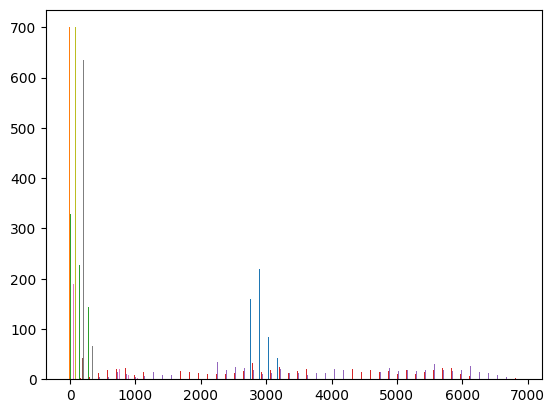

In [97]:
#EJERCICIO2

# Generar histograma de todas las variables
plt.hist(datos_1.values, bins=50)
plt.show()


In [98]:
# Normalizar todas las columnas excepto la última
cols_to_normalize = datos_1.columns[:-1]
datos_1[cols_to_normalize] = (datos_1[cols_to_normalize] - datos_1[cols_to_normalize].min()) / (datos_1[cols_to_normalize].max() - datos_1[cols_to_normalize].min())
datos_1['Cover_Type'] = datos_1['Cover_Type'] - 1 

C:\Users\smite\AppData\Local\Temp\ipykernel_11196\3583928770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_1[cols_to_normalize] = (datos_1[cols_to_normalize] - datos_1[cols_to_normalize].min()) / (datos_1[cols_to_normalize].max() - datos_1[cols_to_normalize].min())
C:\Users\smite\AppData\Local\Temp\ipykernel_11196\3583928770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_1['Cover_Type'] = datos_1['Cover_Type'] - 1


In [99]:
datos_norm = datos_1.copy()

In [143]:
#EJERCICIO3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(datos_norm.iloc[:, :-1], datos_norm.iloc[:, -1], test_size=0.2, random_state=100)

# entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=100)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=100)

In [101]:
# predecir en datos de test y calcular métricas de evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)
matrix = confusion_matrix(y_test, y_pred)

# imprimir resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", matrix)

Accuracy: 0.7428571428571429
F1-score: 0.7420778722763193
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        33
           1       0.77      0.79      0.78        80
           4       0.67      0.74      0.70        27

    accuracy                           0.74       140
   macro avg       0.73      0.72      0.72       140
weighted avg       0.74      0.74      0.74       140

Confusion matrix:
 [[21 12  0]
 [ 7 63 10]
 [ 0  7 20]]


In [102]:
#EJERCICIO 4

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Instanciar el modelo de árbol de decisión
tree = DecisionTreeClassifier(random_state=100)

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos_1.iloc[:, :-1], datos_1.iloc[:, -1], test_size=0.2, random_state=100)

# Entrenar el modelo en los datos de entrenamiento
tree.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = tree.predict(X_test)

In [103]:
# Calcular las métricas de evaluación del modelo
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de evaluación del modelo
print("Accuracy:", acc)
print("F1-score (weighted):", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", cm)


Accuracy: 0.7357142857142858
F1-score (weighted): 0.7356426118851169
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65        33
           1       0.78      0.76      0.77        80
           4       0.70      0.78      0.74        27

    accuracy                           0.74       140
   macro avg       0.71      0.73      0.72       140
weighted avg       0.74      0.74      0.74       140

Confusion matrix:
 [[21 12  0]
 [10 61  9]
 [ 1  5 21]]


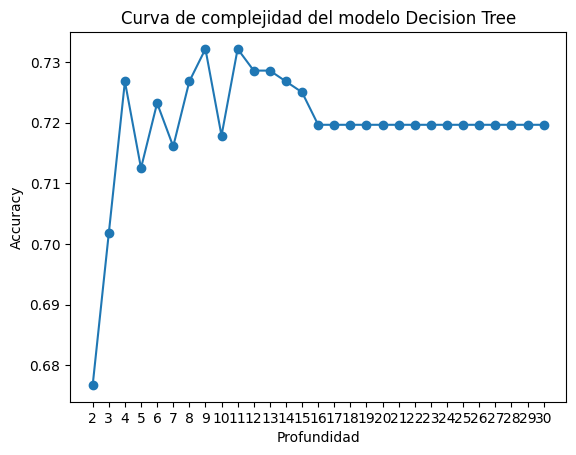

El valor óptimo de la profundidad del árbol es: 9


In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir rango de profundidades
depths = range(2, 31)

# Crear modelo Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=100)

# Definir parámetros de GridSearchCV
param_grid = {'max_depth': depths}

# Realizar GridSearchCV
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Guardar resultados de GridSearchCV
results = grid_search.cv_results_

# Obtener los valores de los parámetros y el score
params = results['params']
scores = results['mean_test_score']

# Crear gráfica de curva de complejidad
plt.plot(depths, scores, '-o')
plt.xlabel('Profundidad')
plt.ylabel('Accuracy')
plt.title('Curva de complejidad del modelo Decision Tree')
plt.xticks(depths)
plt.show()

# Obtener mejor valor de profundidad del árbol
best_depth = grid_search.best_params_['max_depth']
print('El valor óptimo de la profundidad del árbol es:', best_depth)

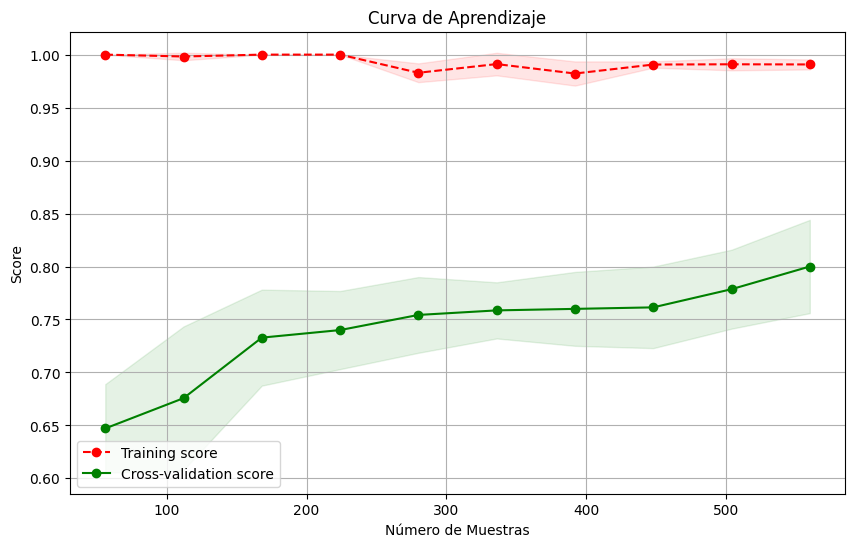

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(.1, 1.0, 10)):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Número de Muestras")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()
    
# Generamos la curva de aprendizaje para el modelo Decision Tree Classifier con profundidad óptima
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)
dtc = DecisionTreeClassifier(max_depth=12, random_state=100)
plot_learning_curve(dtc, X, y, cv)

In [106]:
#EJERCICIO5
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento del modelo
rfc = RandomForestClassifier(random_state=100, oob_score=True)
rfc.fit(X_train, y_train)

# Evaluación del modelo
y_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_report = classification_report(y_test, y_pred, zero_division=0)
rfc_cm = confusion_matrix(y_test, y_pred)
rfc_oob = rfc.oob_score_

In [107]:
tree_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]
median_tree_depth = np.median(tree_depths)

In [108]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Definición de los rangos para cada hiperparámetro
n_estimators_range = [200, 300, 400]
max_depth_range = [20, 30, None]
max_features_range = ["auto", "log2", None]

# Definición de los parámetros a evaluar en GridSearchCV
params_grid = {
    "n_estimators": n_estimators_range,
    "max_depth": max_depth_range,
    "max_features": max_features_range
}
rfc = RandomForestClassifier(n_estimators=350, max_depth=22, max_features='auto', random_state=100, oob_score=True)
# Creación del modelo con GridSearchCV y evaluación
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
rfc_opt = GridSearchCV(RandomForestClassifier(oob_score=True, random_state=100), params_grid, scoring='accuracy', cv=cv, n_jobs=-1)

rfc_opt.fit(X_train, y_train)

# Evaluación del modelo óptimo
y_pred = rfc_opt.predict(X_test)

rfc_opt_accuracy = accuracy_score(y_test, y_pred)
rfc_opt_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_opt_report = classification_report(y_test, y_pred, zero_division=0)
rfc_opt_cm = confusion_matrix(y_test, y_pred)
rfc_opt_oob = rfc_opt.best_estimator_.oob_score_

C:\Users\smite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


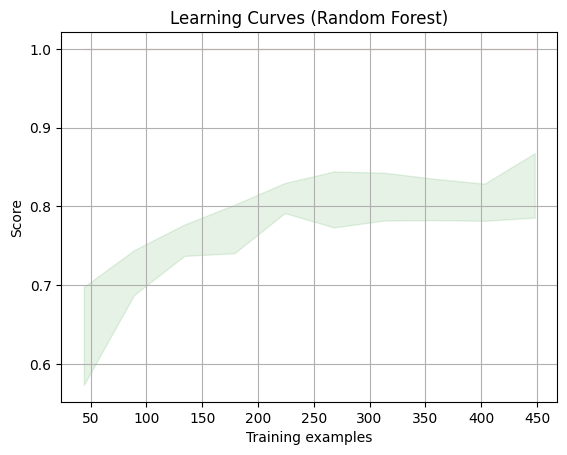

In [109]:
from sklearn.model_selection import learning_curve

# Definición de la función para obtener la gráfica del Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
title = "Learning Curves (Random Forest)"
plot_learning_curve(RandomForestClassifier(n_estimators=350, max_depth=22, max_features='auto', random_state=100), title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()

In [137]:
# Importar las librerías necesarias
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# Crear el modelo
xgb_clf = xgb.XGBClassifier(random_state=100)

# Entrenar el modelo
xgb_clf.fit(X_train, y_train)

# Realizar las predicciones
y_pred = xgb_clf.predict(X_test)

# Calcular las métricas de evaluación
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average='weighted')
xgb_report = classification_report(y_test, y_pred, zero_division=0)
xgb_cm = confusion_matrix(y_test, y_pred)


C:\Users\smite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\data.py:925: UserWarning: Unknown data type: <class 'int'>, trying to convert it to csr_matrix
  warnings.warn(


TypeError: ('Unsupported type for label', "<class 'int'>")

In [ ]:
import numpy as np

print(np.unique(X_test))
print(np.unique(y_pred))
print(np.unique(y_test))
import numpy as np

# Comprobamos si los valores únicos de y_train, y_test y y_pred son los mismos
print(np.array_equal(np.unique(y_train), np.unique(y_test)))
print(np.array_equal(np.unique(y_train), np.unique(y_pred)))
print(np.array_equal(np.unique(y_test), np.unique(y_pred)))
print(all(np.unique(y_train) == np.unique(y_test)))
print(np.unique(y_train))
print(np.unique(y_test))

[0.         0.00384123 0.00768246 0.01578214 0.01671309 0.01920615
 0.01949861 0.01980504 0.02785515 0.03009027 0.03201024 0.03752015
 0.03869266 0.03899721 0.04178273 0.04212638 0.04224045 0.04225352
 0.04239517 0.04735376 0.04748644 0.04897959 0.05013928 0.05136933
 0.05260715 0.05505762 0.05571031 0.06017926 0.06018054 0.06034349
 0.06173604 0.06250967 0.06406685 0.06478089 0.0653009  0.0672016
 0.07093654 0.07474718 0.07488782 0.07799443 0.07813709 0.0793854
 0.08046314 0.08356546 0.08368753 0.08525577 0.08779129 0.08834827
 0.08913649 0.09470752 0.09528586 0.09658508 0.09731114 0.10027855
 0.10259417 0.10306407 0.10318042 0.10371319 0.10382175 0.10584958
 0.10625824 0.10755442 0.10832497 0.10889638 0.11142061 0.11267606
 0.11428571 0.11622453 0.11769017 0.11836735 0.12036108 0.12244898
 0.12256267 0.12285316 0.12437312 0.12534819 0.12625716 0.12653061
 0.12738215 0.12804097 0.1281337  0.13061224 0.13088084 0.13091922
 0.13136314 0.13370474 0.1339935  0.13440321 0.13469388 0.138775

In [ ]:
from sklearn.model_selection import GridSearchCV

# Rangos de los hiperparámetros
n_estimators_range = np.arange(100, 501, 100)
max_depth_range = np.arange(6, 21, 2)
learning_rate_range = [0.01, 0.1, 0.3, 0.5]

# Definición de los parámetros a evaluar en GridSearchCV
params_grid = {
    "n_estimators": n_estimators_range,
    "max_depth": max_depth_range,
    "learning_rate": learning_rate_range
}

# Creación del modelo con GridSearchCV y evaluación
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
xgb_opt = GridSearchCV(xgb.XGBClassifier(random_state=100), params_grid, scoring='accuracy', cv=cv, n_jobs=-1)
xgb_opt.fit(X_train, y_train)

# Evaluación del modelo óptimo
y_pred = xgb_opt.predict(X_test)

xgb_opt_accuracy = accuracy_score(y_test, y_pred)
xgb_opt_f1 = f1_score(y_test, y_pred, average='weighted')
xgb_opt_report = classification_report(y_test, y_pred, zero_division=0)
xgb_opt_cm = confusion_matrix(y_test, y_pred)

ValueError: 
All the 800 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\smite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\smite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [0 1 4]


In [141]:
#EJERCICIO 7
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(type(model).__name__)
    print("Accuracy: {:.4f}".format(acc))
    print("F1-score: {:.4f}".format(f1))
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)


ValueError: y should be a 1d array, got an array of shape () instead.

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(type(model).__name__)
    print("Accuracy: {:.4f}".format(acc))
    print("F1-score: {:.4f}".format(f1))
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)